In [38]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

In [39]:
#stacking data on top of each other from different sheet of excel file
data_2009_2010 = pd.read_excel("customer_transactions_sample.xlsx","Year 2009-2010")
data_2010_2011 = pd.read_excel("customer_transactions_sample.xlsx","Year 2010-2011")
data = pd.concat([data_2009_2010,data_2010_2011], axis = 0)

In [40]:
#checking how the data looks
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [41]:
#getting the count of rows and columns in our data
data.shape

(1067371, 8)

In [42]:
#checking data type of each column in out data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [43]:
#seperating the character at the end of the StockCode column value, and storing that in another column "StockCode Character".
# in future, we can take just the "C" value from the StockCode Character column to see how many orders got cancelled
data['StockCode Character'] = data['StockCode'].apply(lambda x: x[-1] if isinstance(x, str) and len(x) > 5 else '')

In [44]:
#creating a seperate column to keep track of cancelled orders
data['cancelled'] = data['StockCode Character'].apply(lambda x: 1 if x == 'C' else 0)

In [46]:
#Creating a Column to store Year of Invoice Date
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceYear'].value_counts()

InvoiceYear
2010    522714
2011    499429
2009     45228
Name: count, dtype: int64

In [47]:
#droping the rows that contains NA value
data.dropna(inplace=True)

In [48]:
#removing the rows with quantity <= 0
data = data[data['Quantity']>0]

In [49]:
#removing the rows with Price <= 0
data = data[data['Price']>0]

In [50]:
data.shape

(805549, 11)

In [51]:
#now after cleaning our data, it got reduced to 805549 rows from 1067371

In [52]:
#data visualization and insights

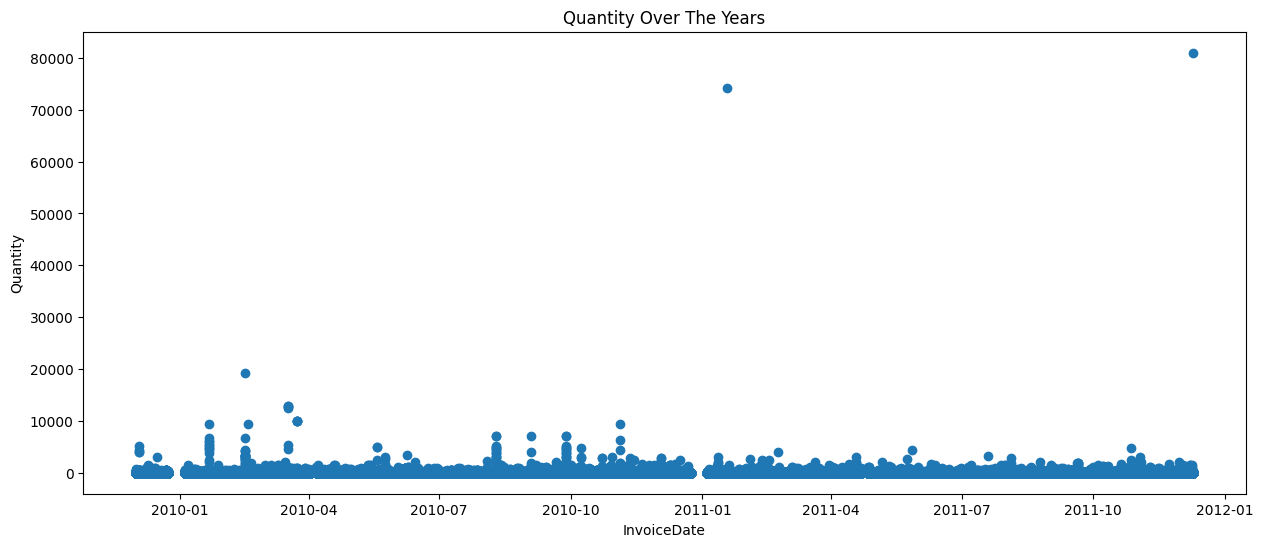

In [54]:
#in which month and year, Decathlon sold the maximum quantity of item 
plt.figure(figsize=(15, 6))
plt.scatter(data['InvoiceDate'], data['Quantity'])
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.title('Quantity Over The Years')
plt.show()

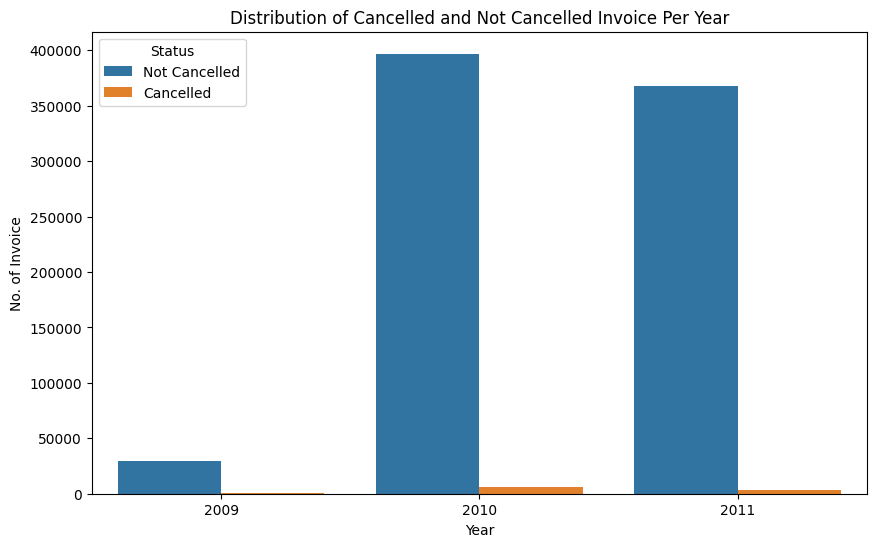

In [55]:
#Distribution of Cancelled and Not Cancelled Invoice of Per Year
plt.figure(figsize=(10, 6))
sns.countplot(x='InvoiceYear', hue='cancelled', data=data)
plt.title('Distribution of Cancelled and Not Cancelled Invoice Per Year')
plt.xlabel('Year')
plt.ylabel('No. of Invoice')
plt.legend(title='Status', labels=['Not Cancelled', 'Cancelled'])
plt.show()

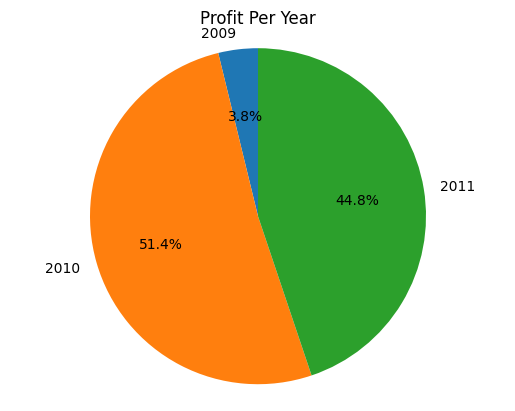

In [56]:
#Total Profit Per Year
profit_per_year = data.groupby('InvoiceYear')['Price'].sum()

# Plotting
profit_per_year.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Profit Per Year')
plt.ylabel('')
plt.axis('equal') 
plt.show()

C:\Users\dutta\AppData\Local\Temp\ipykernel_5404\1553710488.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


World columns: Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')
New data columns: Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'StockCode Character', 'cancelled',
       'InvoiceYear'],
      dtype='object')


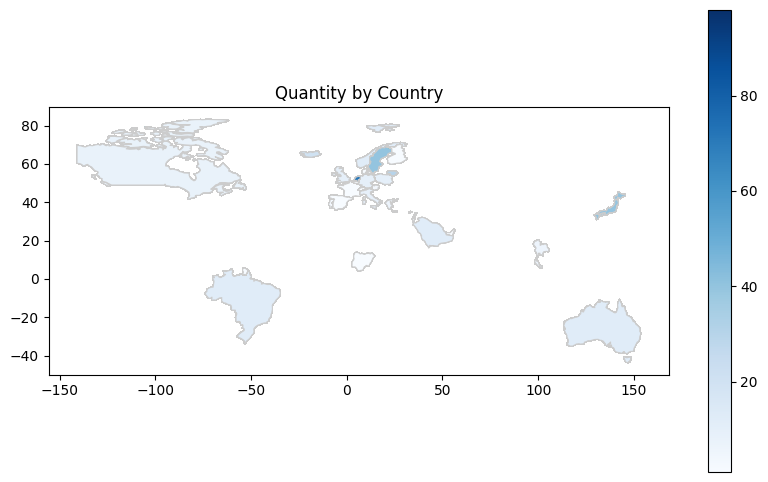

In [37]:

# Assuming new_data is already defined and contains 'Quantity' and 'Country'
new_data = data[data['Quantity'] < 100]

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(new_data, how='left', left_on='name', right_on='Country')

# Plot the map
fig, ax = plt.subplots(1, figsize=(10, 6))
world.plot(column='Quantity', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Quantity by Country')
plt.show()


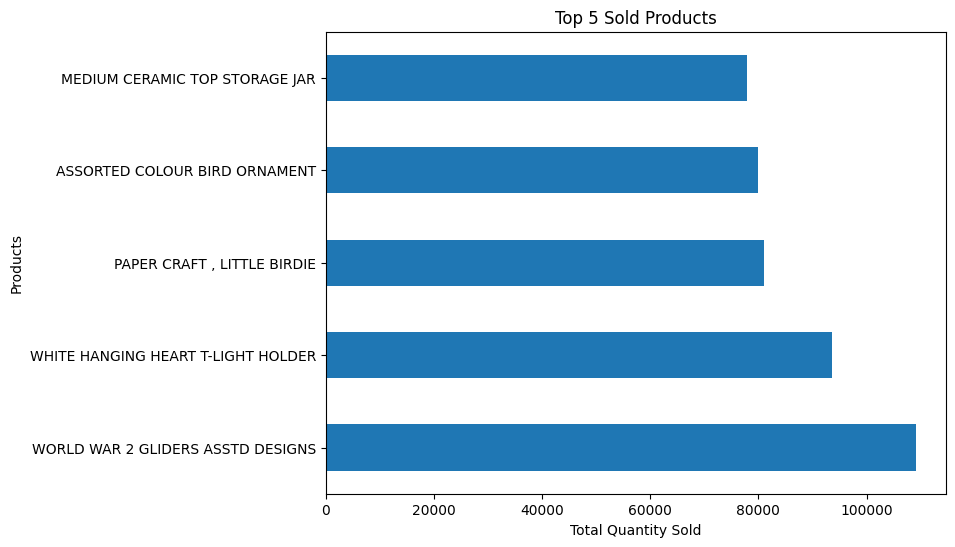

In [58]:
#Top 5 Products
product_totals = data.groupby('Description')['Quantity'].sum()


top_products = product_totals.sort_values(ascending=False).head(5)

top_products.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Total Quantity Sold')
plt.ylabel('Products')
plt.title('Top 5 Sold Products')
plt.show()